In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [2]:
def julia_map(z, C):
    return z**2 + C

In [3]:
max_iter = 10**2
C = complex(0, -0.5)

In [4]:
z_real = []
z_imag = []
z = complex(0., 0.0)

for i in range(max_iter):
    z = julia_map(z, C)
    z_real.append(z.real)
    z_imag.append(z.imag)

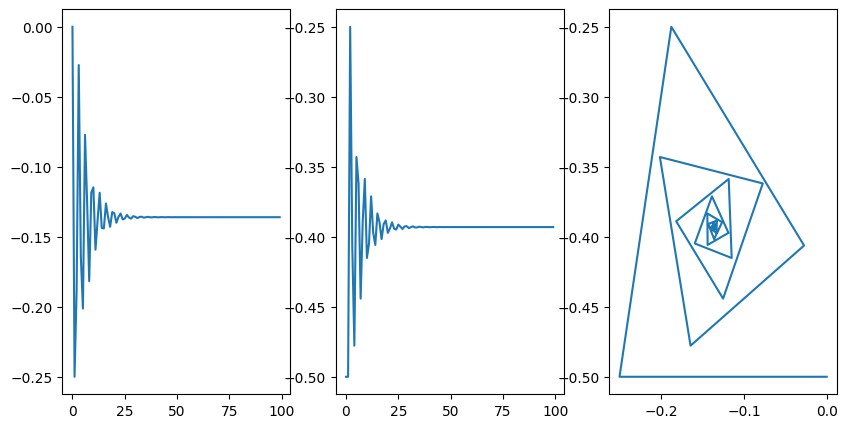

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].plot(z_real)
axes[1].plot(z_imag)
axes[2].plot(z_real, z_imag)
plt.show()

In [6]:
def plot_evoution(z_real, z_imag, **kwargs):
    plt.plot(z_real, z_imag, **kwargs)
    plt.show()

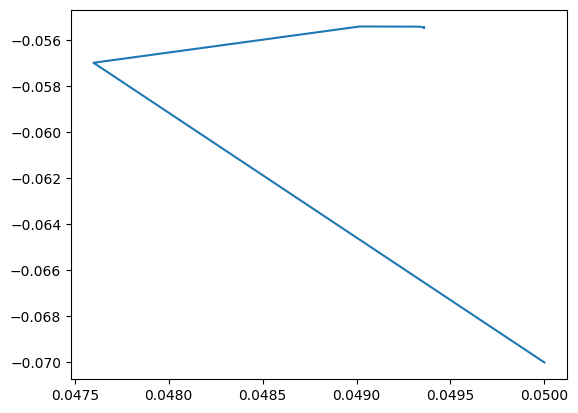

In [7]:
z_real = []
z_imag = []
z = complex(-0.1, 0.1)

for i in range(max_iter):
    z = julia_map(z, complex(0.05, -0.05))
    z_real.append(z.real)
    z_imag.append(z.imag)

plot_evoution(z_real, z_imag)

In [8]:
def julia_algo(z, C, max_iter=max_iter):
    for i in range(max_iter):
        z = julia_map(z, C)
        if abs(z) > 100:
            return i
    
    return max_iter

In [9]:
width = 1.5
xs = ys = np.linspace(-width, width, 1000)
Z = np.zeros((len(xs), len(xs)), dtype=np.uint8)
C = complex(-0.5251993, -0.5251993)

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        Z[i][j] = julia_algo(complex(x, y), C)

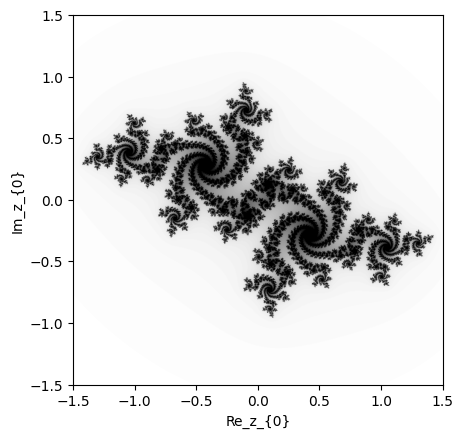

In [10]:
plt.imshow(Z.T, cmap=cm.binary, extent=[-width, width, -width, width])
plt.xlabel('Re_z_{0}')
plt.ylabel('Im_z_{0}')
plt.show()

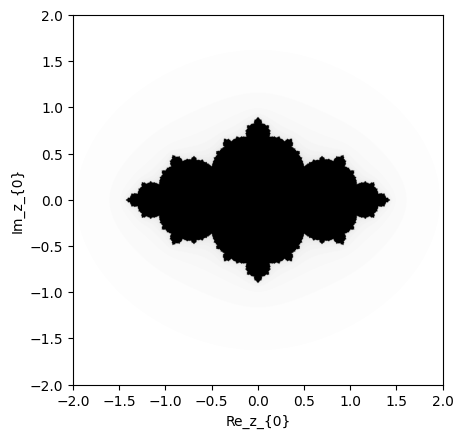

In [11]:
width = 2
xs = ys = np.linspace(-width, width, 1000)
Z = np.zeros((len(xs), len(xs)))
C = complex(1 - (1 + np.sqrt(5)) / 2, .0)

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        Z[i][j] = julia_algo(complex(x, y), C)

plt.imshow(Z.T, cmap=cm.binary, extent=[-width, width, -width, width])
plt.xlabel('Re_z_{0}')
plt.ylabel('Im_z_{0}')
plt.show()

In [18]:
ticks = 100
a = np.linspace(0, 2*np.pi, ticks)
c = np.exp(1j * a)

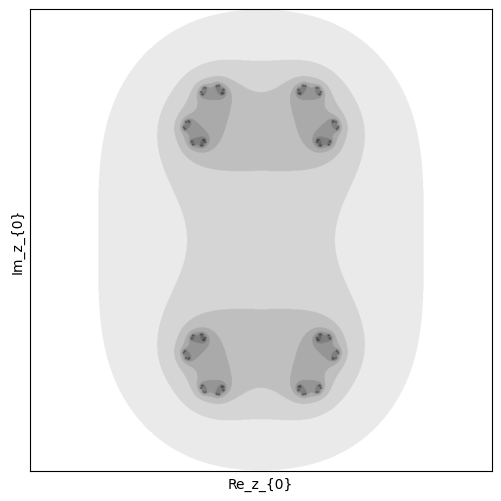

In [19]:
width = 2
xs = ys = np.linspace(-width, width, 1000)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.set_xlabel('Re_z_{0}')
ax.set_xlabel('Im_z_{0}')

def animate(frame):
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    Z = np.ones((len(xs), len(ys))) 
    
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            Z[i, j] = julia_algo(complex(x, y), c[frame])
    
    img = ax.imshow(Z.T, cmap=cm.binary, extent=[-width, width, -width, width])
    ax.set_xlabel('Re_z_{0}')
    ax.set_ylabel('Im_z_{0}')
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=ticks, interval=100, blit=True, repeat=True)
plt.show()

In [20]:
anim.save('julia_set.gif', writer='imagemagick') 

MovieWriter imagemagick unavailable; using Pillow instead.
